In [18]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import demoji
from transformers import BertTokenizer,pipeline
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
import re
import contractions
from textblob import TextBlob
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")



url = "https://www.forbes.com/sites/zakdoffman/2024/04/29/google-free-ai-upgrade-samsung-s24-pixel-vs-apple-iphone-15-pro-max/"
r = requests.get(url)
print("status code of article\n",r.status_code)


status code of article
 200


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
soup = BeautifulSoup(r.text,"html.parser")

results = soup.find("body")
print(results.text)


Subscribe To NewslettersBETATHIS IS A BETA EXPERIENCE. OPT-OUT HEREMore From ForbesNov 14, 2024,03:18pm ESTInside Matt Gaetz’s Family FortuneNov 17, 2024,04:11pm ESTDigital Forensics—What Exactly Is Digital Evidence?Nov 17, 2024,09:43am ESTGoogle Issues New Security Cloaking Warning As Attackers Use AI In AttacksNov 17, 2024,08:04am ESTDon’t Hold Down The Ctrl Key—New Warning As Cyber Attacks ConfirmedNov 17, 2024,06:47am ESTNew Google 2FA Update Makes Security Safer For 100 Million UsersNov 17, 2024,05:50am ESTGood Hacker Hacked 100 Dark Web Hackers Using Fake Ransomware ToolNov 17, 2024,04:34am ESTGmail Alert—Leak Reveals New Email Addresses Coming For 2.5 Billion UsersNov 17, 2024,03:52am ESTGoogle’s Gmail Decision—Why You Need A New Email AddressNov 16, 2024,07:24pm ESTT-Mobile Hack Linked To Chinese State Sponsored HackersEdit StoryForbesInnovationCybersecuritySamsung’s ‘Exciting’ Galaxy Update Starts iPhone Security BattleZak DoffmanContributorOpinions expressed by Forbes Contrib

In [20]:
sample_txt = [results.text for result in results]
sample_txt = " ".join(sample_txt)


MODEL_NAME = "bert-base-uncased"

tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

In [21]:

summarization_pipeline = pipeline("summarization", model="facebook/bart-large-cnn", framework="pt")
summary = summarization_pipeline(sample_txt[:1024])
print("summarization using pipeline\n",summary)

summarization using pipeline
 [{'summary_text': 'Google Issues New Security Cloaking Warning As Attackers Use AI In Attacks. Leak Reveals New Email Addresses Coming For 2.5 Billion Users. T-Mobile Hack Linked To Chinese State Sponsored Hackers. Samsung’s ‘Exciting’ Galaxy Update Starts iPhone Security Battle.'}]


In [22]:
##dataset for both Apple and SamSung


samsung_df = pd.read_csv("C:/ML/MAW/final_dataset.csv",delimiter=',')

samsung_df.isna().sum()
samsung_df.duplicated().sum()
samsung_df.drop_duplicates(inplace=True)
samsung_df.dtypes
samsung_df.drop('Unnamed: 0',inplace=True,axis=1)
samsung_df = samsung_df[~samsung_df['Brand'].isin(['MI', 'OPPO', 'Vivo', 'OnePlus',"Apple"])]

samsung_df['Brand'].value_counts()
samsung_df.drop_duplicates(inplace=True)
samsung_df.isna().sum()

Brand      0
Model      0
stars      0
comment    0
dtype: int64

In [23]:
iphone_df = pd.read_csv("C:/ML/MAW/iphone.csv",delimiter=',')
iphone_df.isna().sum()


iphone_df.dtypes
iphone_df.isna().sum()
iphone_df['reviewDescription'] = iphone_df['reviewDescription'].fillna("")
iphone_df['reviewUrl'] = iphone_df['reviewUrl'].fillna("")
iphone_df.duplicated().sum()



0

In [24]:
### lowercasing iphone reviews


iphone_df['Text'] = iphone_df['reviewDescription']
iphone_df.drop("reviewDescription",inplace=True,axis=1)

iphone_df['Text'].head(10)

iphone_df['Text'] = iphone_df['Text'].str.lower()


In [25]:
iphone_df['Text'] = iphone_df['Text'].apply(lambda x: contractions.fix(x))
samsung_df['comment'] = samsung_df['comment'].apply(lambda x: x.replace('\r', '').replace('\n', ''))
samsung_df['comment'] = samsung_df['comment'].str.lower()


In [26]:
def clean_text(text):
    
    
    text = re.sub(r'(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9_]+)', '',text)
    
    text = re.sub(r'http\S+', '', text)
    
    text = re.sub(r'#(\w+)','',text)
    
    text = demoji.replace(text,'')

    
    text = re.sub(r'[^\w\s]', '',text)

    text = re.sub(r'\@w+|\#','',text)
    



    
    
    return text


## apply clean text to apply and samsung
samsung_df['comment'] = samsung_df['comment'].apply(clean_text)
samsung_df['comment'].head(10)


0      at first glance it looks a bit bulky camera ...
1              cons_overpricedbattery drain only fa...
2              awesome camera awesome battery aweso...
3              genuine feedback to samsung and all ...
4              ok so here comes the first review of...
5              theres something wrong with the new ...
6              after using for more than 2 days i m...
7              i am giving this review after spendi...
8              this is a perfect mobile for you1 if...
9              it has issue with camera in night mo...
Name: comment, dtype: object

In [11]:
iphone_df['Text'] = iphone_df['Text'].apply(clean_text)
iphone_df['Text'].head(10)


0    every thing is good about iphones theres nothi...
1    it look so fabulous i am android user switched...
2    i tried to flip camera while recording but no ...
3                                          100 genuine
4           happy to get the iphone 13 in amazon offer
5                                              5 star 
6    great product nothing to say as the name apple...
7                                        good product 
8                                         nice product
9                                    excellent product
Name: Text, dtype: object

In [12]:
sw = set(stopwords.words("english"))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    cleaned_tokens = [word for word in tokens if word.lower() not in sw]
    return " ".join(cleaned_tokens)


samsung_df['comment'] = samsung_df['comment'].apply(remove_stopwords)
samsung_df['comment'].head(10)


0    first glance looks bit bulky camera display et...
1    cons_overpricedbattery drain fast normal uses ...
2    awesome camera awesome battery awesome display...
3    genuine feedback samsung buyersnot upto markba...
4    ok comes first review phone ordered first day ...
5    theres something wrong new samsung m51 mobile ...
6    using 2 days must say snapdragon 730g works wo...
7    giving review spending 20 days phone retail us...
8    perfect mobile you1 properly read spec buying ...
9    issue camera night mode pro modeit seems like ...
Name: comment, dtype: object

In [27]:
iphone_df['Text'] = iphone_df['Text'].apply(remove_stopwords)
iphone_df['Text'].head(10)


0    every thing good iphones , nothing compared sp...
1    look fabulous , android user switched apple , ...
2    tried flip camera recording facility added . p...
3                                        100 % genuine
4                     happy get iphone 13 amazon offer
5                                             5 star 👍
6    great product ... nothing say , name apple ide...
7                                      good product 😀💯
8                                         nice product
9                                    excellent product
Name: Text, dtype: object

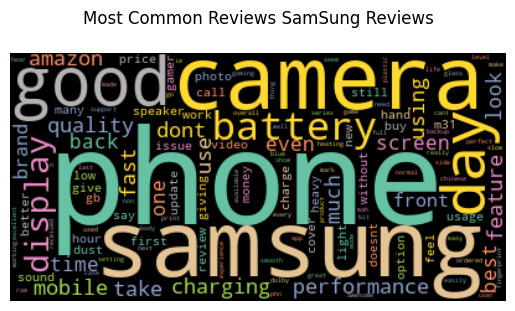

In [14]:
samsung_txt = " ".join(i for i in samsung_df['comment'])
apple_txt = " ".join(i for i in iphone_df['Text'])



### wordcloud for Samsung Reviews only
wc = WordCloud(colormap="Set2",collocations=False).generate(samsung_txt)
plt.title("Most Common Reviews SamSung Reviews\n")
plt.axis("off")
plt.imshow(wc,interpolation="bilinear")
plt.show()


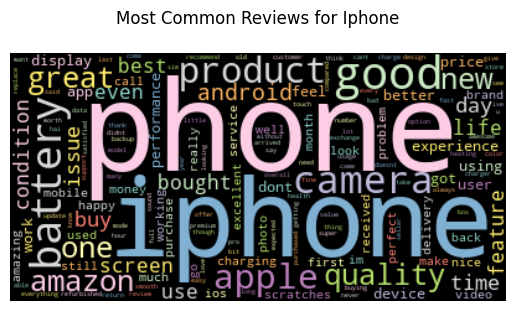

In [28]:
#wordcloud for apple(iphone) reviews only

wc = WordCloud(colormap="Set3",collocations=False).generate(apple_txt)
plt.title("Most Common Reviews for Iphone\n")
plt.axis("off")
plt.imshow(wc,interpolation="bilinear")
plt.show()




In [29]:
#most common words in Reviews for samsung phones

blob = TextBlob(samsung_txt).words

from nltk import FreqDist
most_common_words_from_samsung_reviews = FreqDist(blob).most_common(50)
print("Top 50 Most Words For Reviews SamSung",most_common_words_from_samsung_reviews)

Top 50 Most Words For Reviews SamSung [('phone', 336), ('samsung', 216), ('good', 191), ('camera', 185), ('battery', 149), ('like', 109), ('days', 95), ('display', 92), ('quality', 85), ('charging', 81), ('mobile', 78), ('performance', 75), ('using', 74), ('dont', 72), ('fast', 71), ('amazon', 67), ('day', 64), ('one', 63), ('back', 61), ('also', 58), ('use', 58), ('much', 58), ('time', 53), ('even', 53), ('best', 53), ('screen', 52), ('features', 52), ('front', 50), ('take', 49), ('price', 47), ('usage', 43), ('issue', 42), ('buy', 40), ('still', 40), ('cover', 40), ('sound', 39), ('new', 39), ('many', 39), ('brand', 39), ('doesnt', 39), ('charge', 39), ('first', 38), ('better', 38), ('review', 37), ('2', 37), ('money', 37), ('10', 37), ('speaker', 36), ('giving', 36), ('get', 36)]


In [30]:
## same thing except for Iphones

blob = TextBlob(apple_txt).words

most_common_words_for_iphones = FreqDist(blob).most_common(50)
print("Most Common Reviews for Iphones\n",most_common_words_for_iphones)


Most Common Reviews for Iphones
 [('phone', 1605), ('iphone', 1188), ('good', 912), ('battery', 747), ('camera', 585), ('apple', 495), ('product', 488), ('like', 409), ('13', 390), ('amazon', 379), ('new', 374), ('quality', 362), ('great', 347), ('android', 339), ('one', 334), ('buy', 281), ('also', 262), ('life', 253), ('use', 253), ('screen', 246), ('time', 245), ('get', 244), ('best', 239), ('even', 232), ('bought', 213), ('got', 205), ('using', 203), ('experience', 203), ('display', 202), ('price', 198), ('condition', 198), ('14', 195), ('performance', 193), ('better', 191), ('dont', 189), ('charging', 178), ('would', 178), ('excellent', 175), ('really', 172), ('much', 171), ('device', 169), ('day', 168), ('im', 167), ('working', 167), ('first', 165), ('features', 164), ('money', 164), ('nice', 163), ('scratches', 159), ('go', 157)]


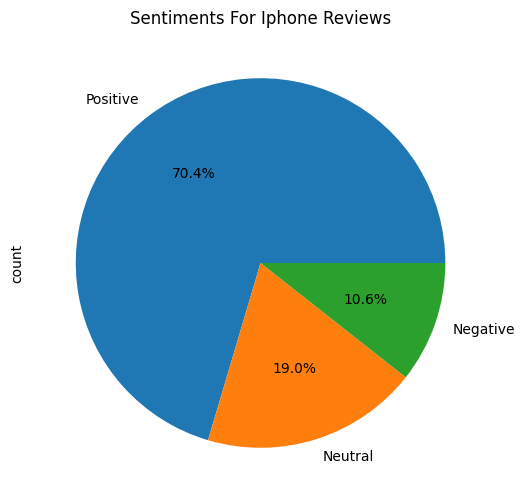

In [31]:
## textblob for sentiments

def polarity(text):
    return TextBlob(text).polarity


iphone_df['polarity'] = iphone_df['Text'].apply(polarity)
samsung_df['polarity'] = samsung_df['comment'].apply(polarity)

## assigning sentiment scores


def sentiment(label):
    if label <0:
        return "Negative"
    elif label == 0:
        return "Neutral"
    elif label > 0:
        return "Positive"


iphone_df['sentiment'] = iphone_df['polarity'].apply(sentiment)
samsung_df['sentiment'] = samsung_df['polarity'].apply(sentiment)


plt.figure(figsize=(10,6))
iphone_df['sentiment'].value_counts().plot(kind='pie',autopct="%1.1f%%")
plt.title("Sentiments For Iphone Reviews")
plt.show()

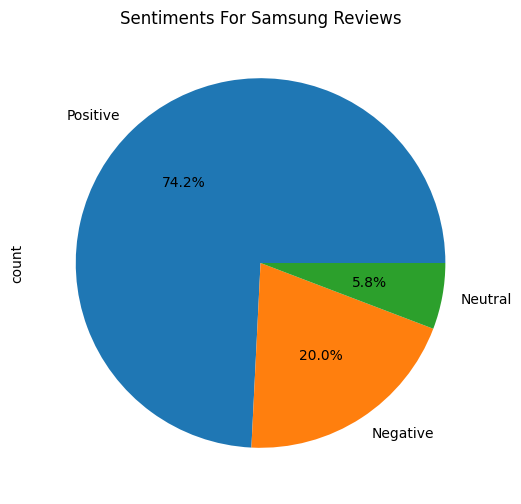

In [32]:

plt.figure(figsize=(10,6))
samsung_df['sentiment'].value_counts().plot(kind='pie',autopct="%1.1f%%")
plt.title("Sentiments For Samsung Reviews")
plt.show()

In [33]:
### for Iphone reviews
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X = iphone_df['Text']
y = iphone_df['sentiment']
y = le.fit_transform(y)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)

from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=30000)
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index
print("Length of Word Index\n",len(word_index))


X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


from tensorflow.keras.utils import pad_sequences,to_categorical

max_length = 0
for sequence in X_train:
    sequence_length = len(sequence)
    if sequence_length > max_length:
        max_length = sequence_length

print("Max Length of Sequences: ",max_length)


X_train = pad_sequences(X_train,padding="post")
X_test = pad_sequences(X_test,padding="post")

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,SpatialDropout1D,Bidirectional,Dropout

RNN = Sequential()
RNN.add(Embedding(len(word_index)+1,output_dim=400,input_length=max_length))
RNN.add(SpatialDropout1D(0.5))
RNN.add(Bidirectional(LSTM(300,dropout=0.1,recurrent_dropout=0.1)))
RNN.add(Dropout(0.4))
RNN.add(Dense(3,activation='softmax'))
RNN.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])
history = RNN.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=(0.1))

loss,accuracy = RNN.evaluate(X_test,y_test)
print("model loss: ",loss)
print("model accuracy: ",accuracy*100)

Length of Word Index
 6073
Max Length of Sequences:  575
Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 240s 3s/step - accuracy: 0.6636 - loss: 0.8365 - val_accuracy: 0.7551 - val_loss: 0.5464
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 234s 3s/step - accuracy: 0.8491 - loss: 0.4237 - val_accuracy: 0.8612 - val_loss: 0.3745
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 240s 3s/step - accuracy: 0.9229 - loss: 0.2358 - val_accuracy: 0.8816 - val_loss: 0.3211
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 255s 4s/step - accuracy: 0.9677 - loss: 0.0936 - val_accuracy: 0.9061 - val_loss: 0.2931
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 245s 4s/step - accuracy: 0.9858 - loss: 0.0483 - val_accuracy: 0.9143 - val_loss: 0.2812
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 246s 4s/step - accuracy: 0.9917 - loss: 0.0261 - val_accuracy: 0.8939 - val_loss: 0.5274
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 250s 4s/step - accuracy: 0.9959 - loss: 0.0267 - val_accuracy: 0.9061 - val_loss: 0.4224
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 261s 4s/step - a

In [36]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
apple_tokens = tokenizer.tokenize(apple_txt)
apple_token_ids = tokenizer.convert_tokens_to_ids(apple_tokens)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


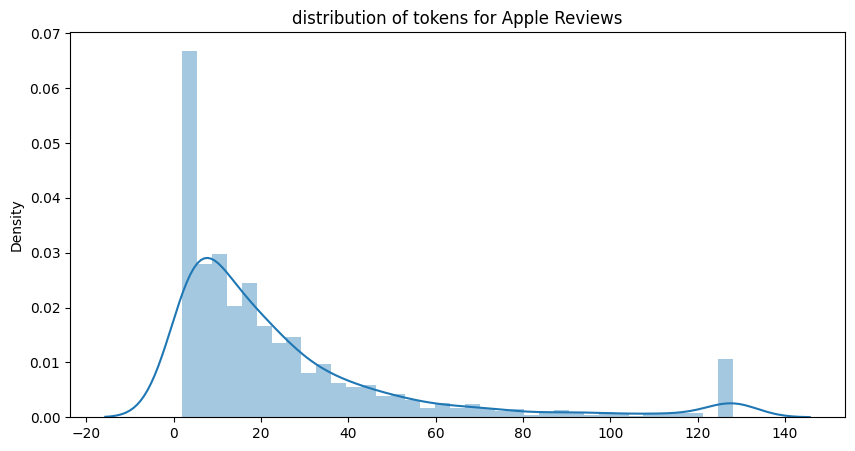

In [37]:
sample_tokens_apple = []
sample_tokens_samsung = []

### to make a distribution of tokens for Iphone Reviews
for txt in iphone_df['Text']:
  tokens = tokenizer.encode(txt,max_length=128)
  sample_tokens_apple.append(len(tokens))




plt.figure(figsize=(10,5))
sns.distplot(sample_tokens_apple)
plt.title("distribution of tokens for Apple Reviews")
plt.show()


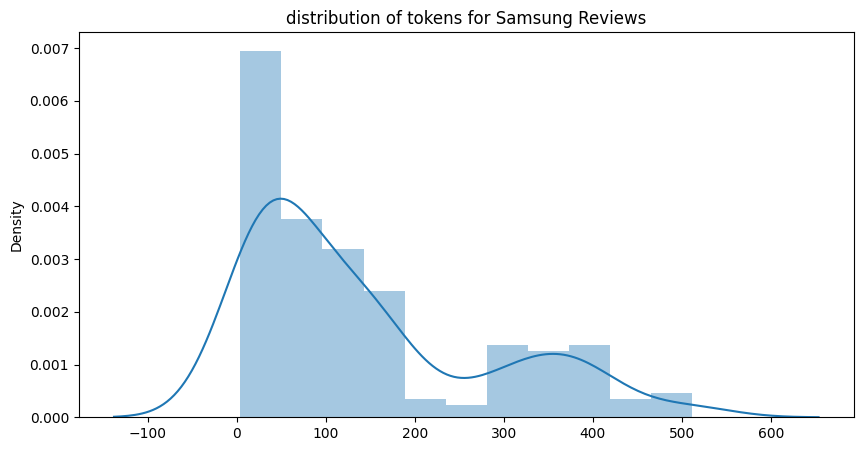

In [38]:
#tokens for Samsung phone reviews
for txt in samsung_df['comment']:
    tokens = tokenizer.encode(txt,max_length=512)
    sample_tokens_samsung.append(len(tokens))


plt.figure(figsize=(10,5))
sns.distplot(sample_tokens_samsung)
plt.title("distribution of tokens for Samsung Reviews")
plt.show()



In [39]:
summarization_pipeline = pipeline("summarization", model="facebook/bart-large-cnn", framework="pt")

summary_apple = summarization_pipeline(apple_txt[:1024])

print("Summarization of Results from Iphone Reviews\n",summary)

Summarization of Results from Iphone Reviews
 [{'summary_text': 'Google Issues New Security Cloaking Warning As Attackers Use AI In Attacks. Leak Reveals New Email Addresses Coming For 2.5 Billion Users. T-Mobile Hack Linked To Chinese State Sponsored Hackers. Samsung’s ‘Exciting’ Galaxy Update Starts iPhone Security Battle.'}]


In [45]:
summary_samsung = summarization_pipeline(sample_txt[:1024])
print("Summarization of Reviews for Samsung Phones\n",summary_samsung)


Summarization of Reviews for Samsung Phones
 [{'summary_text': 'Google Issues New Security Cloaking Warning As Attackers Use AI In Attacks. Leak Reveals New Email Addresses Coming For 2.5 Billion Users. T-Mobile Hack Linked To Chinese State Sponsored Hackers. Samsung’s ‘Exciting’ Galaxy Update Starts iPhone Security Battle.'}]


In [58]:


import numpy as np
import nashpy as nash


A = np.array([[8, 7], [6, 7]])
B = np.array([[7, 8], [7, 7]])


game = nash.Game(A, B)


equilibria = game.support_enumeration()


for eq in equilibria:
    print(eq)

(array([1., 0.]), array([0., 1.]))
(array([0., 1.]), array([0., 1.]))
